# 第6章

## 50.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

SEED = 0

news_corpora = pd.read_csv('data/NewsAggregatorDataset/newsCorpora.csv', sep='\t', header=None, names=['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp'])

news_corpora = news_corpora.loc[news_corpora['publisher'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['category', 'title']]

train, valid_test = train_test_split(news_corpora, test_size=0.2, random_state=SEED, shuffle=True, stratify=news_corpora['category'])
valid, test = train_test_split(valid_test, test_size=0.5, random_state=SEED, shuffle=True, stratify=valid_test['category'])

train.to_csv('out/train.txt', sep='\t', index=False)
valid.to_csv('out/valid.txt', sep='\t', index=False)
test.to_csv('out/test.txt', sep='\t', index=False)

print('学習データ')
print(train['category'].value_counts())
print()
print('検証データ')
print(valid['category'].value_counts())
print()
print('評価データ')
print(test['category'].value_counts())

学習データ
b    4502
e    4223
t    1219
m     728
Name: category, dtype: int64

検証データ
b    562
e    528
t    153
m     91
Name: category, dtype: int64

評価データ
b    563
e    528
t    152
m     91
Name: category, dtype: int64


## 51.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_valid = pd.concat([train, valid])

vectorizer = TfidfVectorizer()

train_valid_feature = vectorizer.fit_transform(train_valid['title'])
test_feature = vectorizer.transform(test['title'])

train_valid_feature = pd.DataFrame(train_valid_feature.toarray(), columns=vectorizer.get_feature_names())
test_feature = pd.DataFrame(test_feature.toarray(), columns=vectorizer.get_feature_names())

train_feature = train_valid_feature[:len(train)]
valid_feature = train_valid_feature[len(train):]

train_feature.to_csv('out/train.feature.txt', sep='\t', index=False)
valid_feature.to_csv('out/valid.feature.txt', sep='\t', index=False)
test_feature.to_csv('out/test.feature.txt', sep='\t', index=False)

train_feature.head()

,00,07,08,09,0ff,0ut,10,100,1000,10000,...,zombies,zone,zooey,zoosk,zuckerberg,zynga,zâ,œlousyâ,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 52.

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_feature, train['category'])

LogisticRegression()

## 53.

In [4]:
import numpy as np

train_pred = lr.predict(train_feature)
train_prob = np.max(lr.predict_proba(train_feature), axis=1)

test_pred = lr.predict(test_feature)
test_prob = np.max(lr.predict_proba(test_feature), axis=1)

(train_pred, train_prob)

(array(['b', 'b', 'e', ..., 'b', 'b', 'e'], dtype=object),
 array([0.61587764, 0.92895613, 0.7513382 , ..., 0.81752671, 0.98021737,
        0.73399155]))

## 54.

In [5]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train['category'], train_pred)
test_accuracy = accuracy_score(test['category'], test_pred)
print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.947
正解率（評価データ）：0.885


## 55.

[[4414   54    3   31]
 [  21 4199    0    3]
 [  79  116  528    5]
 [ 140  112    2  965]]


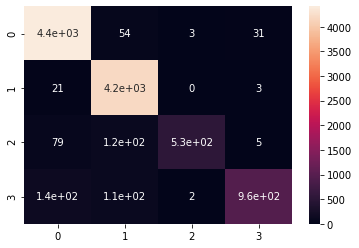

[[533  25   0   5]
 [  7 520   1   0]
 [ 22  23  45   1]
 [ 37  33   0  82]]


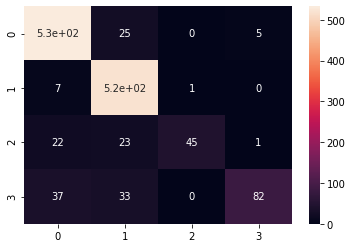

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 学習データ
train_cm = confusion_matrix(train['category'], train_pred)
print(train_cm)
sns.heatmap(train_cm, annot=True)
plt.show()

# 評価データ
test_cm = confusion_matrix(test['category'], test_pred)
print(test_cm)
sns.heatmap(test_cm, annot=True)
plt.show()

## 56.

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 適合率
precision = precision_score(test['category'], test_pred, average=None)
precision = np.append(precision, precision_score(test['category'], test_pred, average='micro'))
precision = np.append(precision, precision_score(test['category'], test_pred, average='macro'))

# 再現率
recall = recall_score(test['category'], test_pred, average=None)
recall = np.append(recall, recall_score(test['category'], test_pred, average='micro'))
recall = np.append(recall, recall_score(test['category'], test_pred, average='macro'))

# F1スコア
f1 = f1_score(test['category'], test_pred, average=None)
f1 = np.append(f1, f1_score(test['category'], test_pred, average='micro'))
f1 = np.append(f1, f1_score(test['category'], test_pred, average='macro'))

scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1}, index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])
scores

,適合率,再現率,F1スコア
b,0.889816,0.946714,0.917384
e,0.865225,0.984848,0.921169
t,0.978261,0.494505,0.656934
m,0.931818,0.539474,0.683333
マイクロ平均,0.884558,0.884558,0.884558
マクロ平均,0.916280,0.741385,0.794705


## 57.

In [8]:
features = train_feature.columns.values
index = [i for i in range(1, 11)]
for c, coef in zip(lr.classes_, lr.coef_):
    print(f'カテゴリ {c}')
    tops = pd.DataFrame(features[np.argsort(coef)[-10:][::-1]], columns=['重要度上位'], index=index).T
    bottoms = pd.DataFrame(features[np.argsort(coef)[:10]], columns=['重要度下位'], index=index).T
    display(pd.concat([tops, bottoms], axis=0))
    print()

カテゴリ b


,1,2,3,4,5,6,7,8,9,10
重要度上位,fed,bank,china,ecb,stocks,update,euro,ukraine,oil,dollar
重要度下位,and,the,ebola,video,her,she,google,apple,facebook,microsoft



カテゴリ e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,her,chris,she,kim,miley,star,cyrus,paul,movie
重要度下位,update,us,google,china,facebook,gm,study,says,ceo,apple



カテゴリ m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,study,cancer,fda,mers,drug,could,health,heart,outbreak
重要度下位,gm,facebook,apple,at,google,climate,deal,ceo,fed,bank



カテゴリ t


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,facebook,apple,microsoft,climate,gm,nasa,tesla,mobile,fcc
重要度下位,stocks,fed,shares,her,cancer,ecb,american,ebola,drug,ukraine


## 58.

In [10]:
from tqdm import tqdm

result = []
for C in tqdm(np.logspace(-5, 4, 10, base=10)):
    lr = LogisticRegression(random_state=SEED, max_iter=10000, C=C)
    lr.fit(train_feature, train['category'])

    train_pred = lr.predict(train_feature)
    valid_pred = lr.predict(valid_feature)
    test_pred = lr.predict(test_feature)

    train_accuracy = accuracy_score(train['category'], train_pred)
    valid_accuracy = accuracy_score(valid['category'], valid_pred)
    test_accuracy = accuracy_score(test['category'], test_pred)

    result.append([C, train_accuracy, valid_accuracy, test_accuracy])

result = np.array(result).T

100%|██████████| 10/10 [06:12<00:00, 37.23s/it]


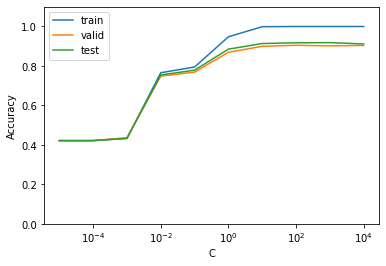

In [11]:
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='valid')
plt.plot(result[0], result[3], label='test')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show()

## 59.

In [ ]:
import optuna

def objective(trial: optuna.Trial):
    l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
    C = trial.suggest_uniform('C', 1e-4, 1e4)

    lr = LogisticRegression(random_state=SEED, max_iter=10000, penalty='elasticnet', solver='saga', l1_ratio=l1_ratio, C=C)
    lr.fit(train_feature, train['category'])

    valid_pred = lr.predict(valid_feature)

    valid_accuracy = accuracy_score(valid['category'], valid_pred)

    return valid_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=3600)

print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value:.3f}')
print('  Params:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')